# Project Resolution
In this project, I use a dataset of United Nations General Assembly resolutions to understand voting patterns of member states. The objective of this project is to practice pandas and test scikit-learn's K-means estimator to solve a classification problem.

Find the dataset here:
<br>
Voeten, Erik; Strezhnev, Anton; Bailey, Michael, 2009, "United Nations General Assembly Voting Data", https://doi.org/10.7910/DVN/LEJUQZ, Harvard Dataverse, V28, UNF:6:dki7hpeRB0FwTFJ00X/TCQ== [fileUNF]  

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# Load UN resolution vote data
df = pd.read_csv("UNVotes.csv", encoding="cp1252")

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 1) Understand the Data

- The dataset is quite large: it has 1,235,113 rows and 27 columns
- Some columns that seem to be important (ex: Country) have several null values
- There is an Unnamed column which seems to be an index column built by the author of this dataset. I will remove it.  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235113 entries, 0 to 1235112
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1235113 non-null  int64  
 1   rcid           1235113 non-null  int64  
 2   ccode          1235113 non-null  int64  
 3   member         905912 non-null   float64
 4   vote           1235113 non-null  int64  
 5   Country        1234926 non-null  object 
 6   Countryname    1234926 non-null  object 
 7   year           1235113 non-null  int64  
 8   session        1235113 non-null  int64  
 9   abstain        1227956 non-null  float64
 10  yes            1234923 non-null  float64
 11  no             1213730 non-null  float64
 12  importantvote  1099156 non-null  float64
 13  date           1235113 non-null  object 
 14  unres          1203809 non-null  object 
 15  amend          583454 non-null   float64
 16  para           649636 non-null   float64
 17  short   

In [4]:
# Remove the unnamed column
df1 = df.drop("Unnamed: 0", axis=1).copy()

Now let's take a look at the first 5 entries of the dataset. These are the column descriptions provided by the author of the dataset

* ``rcid``  : roll call vote id RCID, can be matched with ICPSR id until 1985. Ids>9000 are the emergency special sessions not in the original ICPSR dataset. 
* ``ccode`` : COW country code
* ``member:`` is country a member of the United Nations?
* ``vote:`` vote choice(1 – Yes, 2 – Abstain, 3 – No, 8 – Absent, 9 – Not a member)
* ``Country:`` three letter abbreviation, country name
* ``Countryname:`` UNGA session 
* ``year:`` year of vote
* ``session:`` UN Session (1-73): Note that sessions typically run from September-December but there are typically some votes that take place in the following year. 
* ``abtain:`` description not provided
* ``yes:`` description not provided
* ``no:`` description not provided
* ``important:`` vote identified as important by U.S. State Department report Voting Practices in the United Nations. NOTE: not available for all years!!!!!
* ``date:`` date of vote
* ``unres:`` UN Resolution number. This does not always correspond to the actual UN resolution number before 1985 due to inconsistencies in the original ICPSR data.
* ``amend:``  whether the vote was on an amendment 
* ``para:`` whether the vote was on a paragraph rather than an entire resolution 
* ``short:`` short description
* ``descr:`` longer description
* ``resid:`` New roll-call vote id, number is sequential within sessions (session + 3 digit sequential numve)
* issue codes: these are based on searches in descriptions. They have been subjected to a rudimentary visual check but they may not be 100% accurate,
  * ``ME``: Votes relating to the Palestinian conflict (19%)
  * ``NU``: Votes relating to nuclear weapons and nuclear material (13%)
  * ``DI``: Votes relating to arms control and disarmament (16%)
  * ``CO``: Votes relating to colonialism (18%)
  * ``HR``: Votes relating to human rights (17%)
  * ``EC``: Votes relating to (economic) development (9%)

In [5]:
df1.head()

,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid
0,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001
1,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001
2,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001
3,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001
4,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001


How many UN resolutions are in the dataset? There are about 5,800 resolutions. If we group by ``unres`` and count the number of countries we see how the data is structured - for each resolution there is a unique row for each member state. It is in these rows where individual voting behavior is recorded. (pd. there are 193 member states at the UN as of 2021) 

In [6]:
df1[["unres", "Country"]].groupby("unres").count()

,Country
unres,
A/RES/71/102,193
A/RES/71/103,193
A/RES/71/104,193
A/RES/71/11,193
A/RES/71/121,193
...,...
SS/3/139,197
SS/4/23A,197
SS/4/23B,197


Let's pick a single resolution and see how the data looks like. 
<br>
For example, **A/RES/71/102** is a resolution dated of 2016. There were 176 votes for yes, 0 votes for no and 5 abstentions. The title is "Information from Non-Self-Governing Territories transmitted under Article 73 e of the Charter of the United Nations".

In [7]:
df1[df1["unres"]=="A/RES/71/102"].head()

,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid
1066613,5531,700,1.0,1,AFG,Afghanistan,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1066692,5531,339,1.0,1,ALB,Albania,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1066771,5531,615,1.0,1,DZA,Algeria,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1066850,5531,232,1.0,1,AND,Andorra,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1066929,5531,540,1.0,1,AGO,Angola,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001


Let's count the number of countries by vote code in the column ``vote`` and see if this matches what we saw above.
<br>
Here we see that:
- vote=1 (Yes) has 176 countries
- vote=2 (Abstention) has 5 countries
- vote=8 (Absent) has 12 countries

I am relieved to say that it matches and my understading of the data seems to be correct!

In [8]:
df1[df1["unres"]=="A/RES/71/102"].groupby(["vote"]).count()

,rcid,ccode,member,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid
vote,,,,,,,,,,,,,,,,,,,,,,,,,
1,176,176,176,176,176,176,176,176,176,176,176,176,176,0,0,176,176,176,176,176,176,176,176,176,176
2,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,5,5,5,5,5,5,5,5,5,5
8,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,12,12,12,12,12,12,12,12,12,12


Out of curiosity, let's check which countries abstained from this vote. Turns out it was the Central African Republic, France, Israel, The UK, anc The US.

In [9]:
df1[(df1["unres"]=="A/RES/71/102") & (df1["vote"]==2)]

,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid
1069141,5531,482,1.0,2,CAF,Central African Republic,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1071353,5531,220,1.0,2,FRA,France,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1073012,5531,666,1.0,2,ISR,Israel,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1080991,5531,200,1.0,2,GBR,United Kingdom of Great Britain and Northern I...,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001
1081149,5531,2,1.0,2,USA,United States of America,2016,71,5.0,176.0,0.0,0.0,2016-12-06,A/RES/71/102,NaN,NaN,Information from Non-Self-Governing Territorie...,A/71/251 54 - Information from Non-Self-Govern...,0,0,0,0,1,0,0.0,71001


### 2) Cleaning the Data

Now that I have an idea of how the data looks like, I should start thinking about whether I need the whole dataset.
<p>
For this project, it is not interesting (nor relevant) to use resolution data that is too old. For example, I wouldn't mix data from before and after the 90's because the impact of the end of Cold War could add a lot of confusion to the voting patterns at the UNGA - new states were created and new allegiances were also made after that.   
<p>
Also, the start of the so-called "War on Terror" in the beginning of the 2000's and the economic rise of China may also have added drastic changes to how states vote. If we want to understand current voting pattern, it would make more use sense to stick to recent resolutions. For this project, I will use data from after 2000/1/1.
<p>    
As shown below, now I have approximatelly 380,000 rows of data. 

In [10]:
# I am only interested in recent UN resolutions
df2 = df1[df1["date"]>"2000-01-01"].copy()
df2.shape

(380107, 26)

Now I will check the countries I have in the dataset. I realize that it would be nice to rename some of country names to something shorter or easier to understand.

In [11]:
# Check which countries I see here
# Some countries have unnecessary long names...ex. United Kingdom of Great Britain and Northern Ireland
df2["Countryname"].unique()

array(['United States of America', 'Canada', 'Bahamas', 'Cuba', 'Haiti',
       'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Barbados',
       'Dominica', 'Grenada', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Antigua and Barbuda',
       'Saint Kitts and Nevis', 'Mexico', 'Belize', 'Guatemala',
       'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama',
       'Colombia', 'Venezuela, Bolivarian Republic of', 'Guyana',
       'Suriname', 'Ecuador', 'Peru', 'Brazil',
       'Bolivia (Plurinational State of)', 'Paraguay', 'Chile',
       'Argentina', 'Uruguay',
       'United Kingdom of Great Britain and Northern Ireland', 'Ireland',
       'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Monaco',
       'Liechtenstein', 'Switzerland', 'Spain', 'Andorra', 'Portugal',
       'Germany', 'German Democratic Republic', 'Poland', 'Austria',
       'Hungary', 'Czechoslovakia', 'Czech Republic', 'Slovakia', 'Italy',
       'San Marino', 'Malta', 'Albania',

In [12]:
# Change some of the country names
key = "United States of America_Democratic People's Republic of Korea_United Kingdom of Great Britain and Northern Ireland_Syrian Arab Republic_Bolivia (Plurinational State of)_Iran (Islamic Republic of)_Russian Federation_Venezuela, Bolivarian Republic of_United Arab Emirates_Republic of Korea_United Republic of Tanzania_Micronesia (Federated States of)_Democratic Republic of the Congo_Lao People's Democratic Republic_Lao People’s Democratic Republic".split("_")
val = "USA", "DPRK", "UK", "Syria", "Bolivia", "Iran", "Russia", "Venezuela", "UAE", "South Korea", "Tanzania","Micronesia", "DR Congo","Laos", "Laos",  
change_names = dict(zip(key,val))
change_names

df2["Countryname"] = df["Countryname"].replace(change_names)

In [13]:
# New country names
df2["Countryname"].unique()

array(['USA', 'Canada', 'Bahamas', 'Cuba', 'Haiti', 'Dominican Republic',
       'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Dominica',
       'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines',
       'Antigua and Barbuda', 'Saint Kitts and Nevis', 'Mexico', 'Belize',
       'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica',
       'Panama', 'Colombia', 'Venezuela', 'Guyana', 'Suriname', 'Ecuador',
       'Peru', 'Brazil', 'Bolivia', 'Paraguay', 'Chile', 'Argentina',
       'Uruguay', 'UK', 'Ireland', 'Netherlands', 'Belgium', 'Luxembourg',
       'France', 'Monaco', 'Liechtenstein', 'Switzerland', 'Spain',
       'Andorra', 'Portugal', 'Germany', 'German Democratic Republic',
       'Poland', 'Austria', 'Hungary', 'Czechoslovakia', 'Czech Republic',
       'Slovakia', 'Italy', 'San Marino', 'Malta', 'Albania',
       'The former Yugoslav Republic of Macedonia', 'Croatia',
       'Yugoslavia', 'Bosnia and Herzegovina', 'Slovenia', 'Greece',
       'Cyprus'

Now I will add proper labels to the ``vote`` column. This step is not essential to the project at all, but I will do it anyway so that I can practice the ``map`` function.

In [14]:
# Map vote codes to its labels
df2["vote_label"] = df2["vote"].map({1:"Yes", 2:"Abstain", 3:"No", 8:"Absent", 9:"Not a member"})
df2.head()

,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,vote_label
842175,4237,2,1.0,3,USA,USA,2000,54,0.0,110.0,2.0,0.0,2000-06-06,R/54/267,NaN,NaN,"LEBANON, INTERM FORCE",Financing of the UN Interim Force in Lebanon,1,0,0,0,0,0,0.0,54068,No
842176,4237,20,1.0,1,CAN,Canada,2000,54,0.0,110.0,2.0,0.0,2000-06-06,R/54/267,NaN,NaN,"LEBANON, INTERM FORCE",Financing of the UN Interim Force in Lebanon,1,0,0,0,0,0,0.0,54068,Yes
842177,4237,31,1.0,8,BHS,Bahamas,2000,54,0.0,110.0,2.0,0.0,2000-06-06,R/54/267,NaN,NaN,"LEBANON, INTERM FORCE",Financing of the UN Interim Force in Lebanon,1,0,0,0,0,0,0.0,54068,Absent
842178,4237,40,1.0,1,CUB,Cuba,2000,54,0.0,110.0,2.0,0.0,2000-06-06,R/54/267,NaN,NaN,"LEBANON, INTERM FORCE",Financing of the UN Interim Force in Lebanon,1,0,0,0,0,0,0.0,54068,Yes
842179,4237,41,1.0,8,HTI,Haiti,2000,54,0.0,110.0,2.0,0.0,2000-06-06,R/54/267,NaN,NaN,"LEBANON, INTERM FORCE",Financing of the UN Interim Force in Lebanon,1,0,0,0,0,0,0.0,54068,Absent


While I was doing the data preparation work, I started to get a little bit wary about the balance between yes and no votes. There could be many UNGA resolutions that were just not contentious enough to fully divide member states into yes and no votes. Consider this: there is a vote on the importance to keeping water resources clean and protected. Which member state would vote "no" to that?

So I thought it would be a good idea to check the degree of division in UNGA resolutions. Let's first create a table with all UNGA resolutions.

In [15]:
# Create a dataset with unique unga resolutions
unres = df2[["resid", "descr", "short", "yes", "no", "abstain"]].drop_duplicates()
unres.sort_values("yes", ascending=False)

,resid,descr,short,yes,no,abstain
1066669,71057,A/71/251 39 - Necessity of ending the economic...,"Necessity of ending the economic, commercial a...",191.0,0.0,2.0
1081870,72084,A/72/251 42 - Necessity of ending the economic...,"Necessity of ending the economic, commercial a...",191.0,2.0,0.0
1052524,70001,"Necessity of ending the economic, commercial a...",NaN,191.0,2.0,0.0
1180779,73092,A/73/251 28a - Implementation of the outcome o...,Implementation of the outcome of the World Sum...,188.0,3.0,0.0
1199022,74076,The right to food,The right to food,188.0,2.0,NaN
...,...,...,...,...,...,...
1099489,71112,The President: May I take it that it is the wi...,NaN,6.0,117.0,47.0
1099267,59083,The President (spoke in French): I now give th...,NaN,1.0,89.0,27.0
1099490,71113,The Acting President: In accordance with rule ...,NaN,1.0,116.0,4.0
1099205,56082,The President: Draft resolution V is entitled ...,NaN,1.0,1.0,NaN


Below I calculate the percentage of yes, no, and abstain for each unique resolution. I sort it by the percentage of "yes" and create a very simple bar chart of the top 50 resolutions. We can confirm that there many UNGA resolutions are extremely biased toward "yes". In the cell that follows, I check the top 50 for "no" and the distribution is somewhat more balanced. 

I think that this confirms that we need to be careful with this data. If we are to find voting patterns among member states, we need to select resolutions that are more divisive than "the importance of clean water". These are the ones that will force member states to think about their national interests, side with their respective allies. This is where I hope to find clusters of member states voting together.  

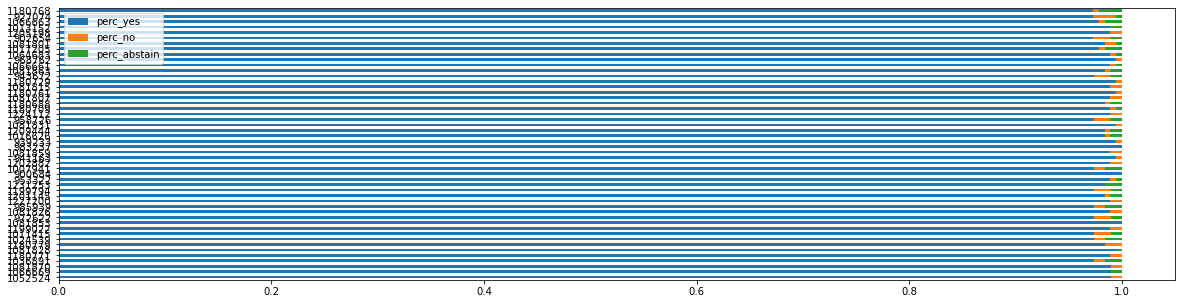

In [16]:
# Prepare data to calculate percentage of yes, no, and abstain.
unres1 = unres.fillna(0)
unres1["total"]=unres1["yes"]+unres1["no"]+unres1["abstain"]
unres1["perc_yes"]=unres1["yes"]/unres1["total"]
unres1["perc_no"]=unres1["no"]/unres1["total"]
unres1["perc_abstain"]=unres1["abstain"]/unres1["total"]

# use pandas barh plot to quickly test hypothesis (top 50 of "yes" votes)
unres_sorted1 = unres1.sort_values("yes", ascending=False)
unres_sorted1.iloc[:50][["perc_yes","perc_no","perc_abstain"]].plot.barh(stacked=True,figsize=(20,5))
plt.show()

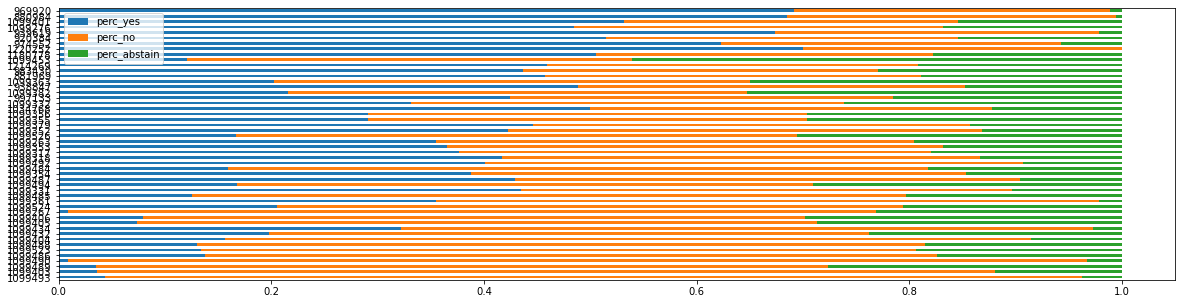

In [17]:
# use pandas barh plot to quickly test hypothesis (top 50 of "no" votes)
unres_sorted2 = unres1.sort_values("no", ascending=False)
unres_sorted2.iloc[:50][["perc_yes","perc_no","perc_abstain"]].plot.barh(stacked=True,figsize=(20,5))
plt.show()

In light of what we understood above, let's build a dataset of "contentious resolutions". I will limit the number of resolutions to 60 because otherwise Kmeans will take forever to finish. Screening the output datamframe below, we can see the majority of resolutions seem to concern human rights issues in a particular country (Iran, Turkmenistan, etc) - these topics that divide the UNGA the most. 

In [18]:
# Dataset of contentious resolutions
n_resolutions = 60

# Grab resolutions that had good quorum and votes were fairly divided
unres["totalvotes"] = unres["yes"]+unres["no"]
unres["diff"] = np.absolute(unres["yes"]-unres["no"])
contentious_res = unres[unres["totalvotes"]>110].sort_values("diff").iloc[:n_resolutions]

contentious_res

,resid,descr,short,yes,no,abstain,totalvotes,diff
1099352,63086,The Acting President: The representative of Ug...,NaN,71.0,75.0,22.0,146.0,4.0
1099331,62085,The Acting President: I shall now put to the v...,NaN,80.0,85.0,19.0,165.0,5.0
1099318,61107,The President: I shall now put to the vote the...,NaN,75.0,81.0,24.0,156.0,6.0
1099379,64085,The Acting President: The representative of Ir...,NaN,78.0,72.0,25.0,150.0,6.0
1099487,71110,The President: In connection with the draft re...,NaN,76.0,84.0,17.0,160.0,8.0
997133,65059,Combating defamation of religions : resolution...,HUMAN RIGHTS ADVANCEMENT,79.0,67.0,40.0,146.0,12.0
1099317,61106,The President: I shall now put to the vote the...,NaN,67.0,79.0,32.0,146.0,12.0
850449,55042,Situation of human rights in the Islamic Repub...,"HUMAN RIGHTS, IRAN",67.0,54.0,46.0,121.0,13.0
1099332,62086,The Acting President: The Assembly will now ta...,NaN,57.0,70.0,45.0,127.0,13.0
1099354,63088,The Acting President: I shall now put to the v...,NaN,69.0,83.0,26.0,152.0,14.0


### 4) Prepare Data for Analysis

Now that I have a list of the UNGA resolutions I want to analyze, I will match those to the original dataframe (df2) using the reolution id ``resid`` and create a new dataframe ``df3``. Then I transpose df3, which is the last step before running the Kmeans estimator - all resolutions will turn into columns, which is why I am limiting the dataset to 60 resolutions.

In [19]:
# grab the resid of contentious resolutions and slice original df table
df3 = df2[df2["resid"].isin(contentious_res["resid"])][["Countryname","resid", "vote"]].reset_index(drop=True)
df3

,Countryname,resid,vote
0,USA,55042,1
1,Canada,55042,1
2,Bahamas,55042,2
3,Cuba,55042,3
4,Haiti,55042,2
...,...,...,...
11682,Venezuela,75002,1
11683,Viet Nam,75002,1
11684,Yemen,75002,1
11685,Zambia,75002,8


In [20]:
# transpose table so that I can run KMeans
df4 = df3.groupby(["Countryname","resid"]).sum().transpose().stack("Countryname").reset_index()
df5 = df4.drop("level_0", axis=1)
df6 = df5.dropna(how="any", axis=0).copy()

The data is almost ready. I just need to check one last issue that came to my mind while building the step above.

This dataset seems to be structured in way that past resolutions might contain member states that did not exist at the time that it was voted. For example, consider the case of South Sudan, officially created in 2011. In such case, the country would be assigned a vote=9 (not a member) and if a country has too many vote=9 ("not a member"), it would be better to remove it altogether from our dataset.

In the heatmap below, we can confirm that in the dataset of 60 resolutions that we have, South Sudan stands out as having a lot of vote=9. I am removing South Sudan. 

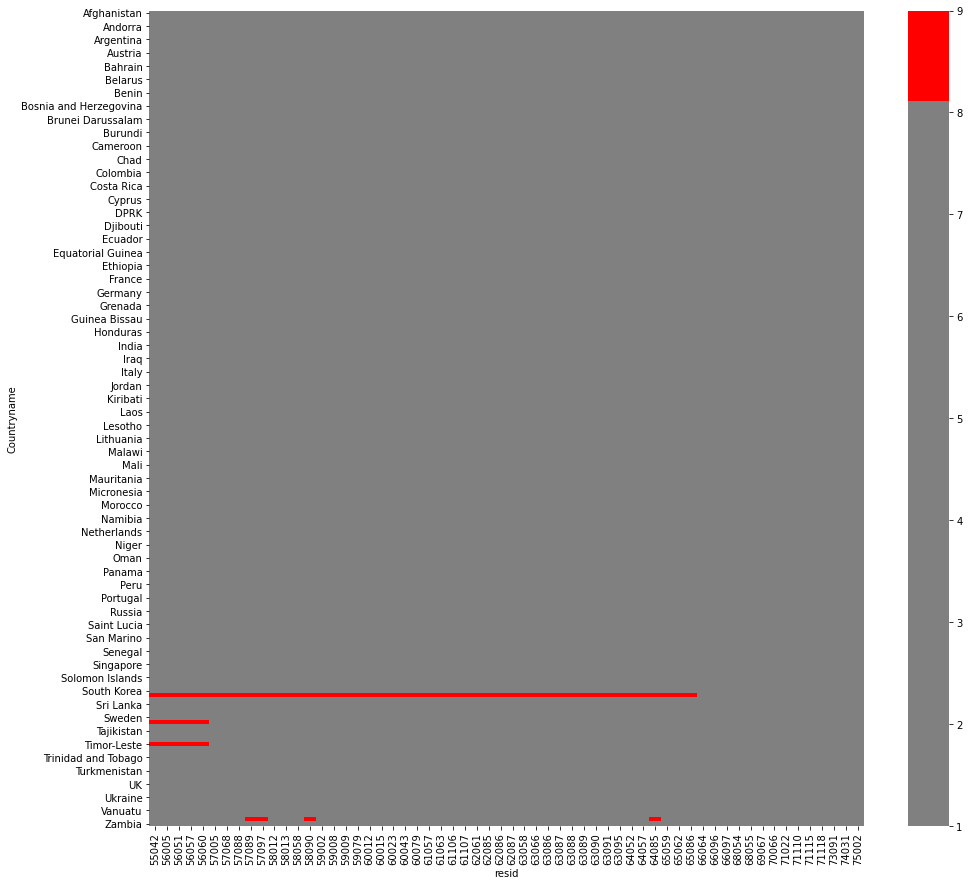

In [21]:
#Check if countries in the data were actually member states during the voting - check if there are too many 9:not a member
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = ListedColormap(["gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "red"])
plt.figure(figsize=(16,15))
sns.heatmap(df6.set_index("Countryname"), cmap=cmap)
plt.show()

In [22]:
# Remove South Sudan
df6 = df6[df6["Countryname"]!="South Sudan"].copy()

In [23]:
# The dataset is ready for analysis
df6

resid,Countryname,55042,56005,56051,56057,56060,57005,57068,57088,57089,57097,58012,58013,58058,58090,59002,59008,59009,59079,60012,60015,60023,60043,60079,61057,61063,61106,61107,62061,62085,62086,62087,63058,63066,63086,63087,63088,63089,63090,63091,63095,64052,64057,64085,65059,65062,65086,66064,66096,66097,68054,68055,69067,70066,71022,71110,71115,71118,73091,74031,75002
0,Afghanistan,3.0,1.0,1.0,3.0,8.0,8.0,8.0,8.0,8.0,8.0,3.0,3.0,8.0,8.0,1.0,8.0,8.0,8.0,3.0,3.0,1.0,8.0,8.0,3.0,8.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,8.0,8.0,8.0,1.0
1,Albania,1.0,3.0,3.0,1.0,1.0,3.0,1.0,8.0,8.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,8.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,8.0,3.0,3.0,3.0
2,Algeria,3.0,1.0,1.0,3.0,3.0,1.0,3.0,8.0,8.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Andorra,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,8.0,1.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
4,Angola,2.0,8.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,8.0,2.0,2.0,1.0,8.0,8.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,1.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Uzbekistan,8.0,8.0,8.0,8.0,8.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,8.0,8.0,1.0,1.0,1.0,3.0,8.0,8.0,1.0,1.0,1.0,3.0,8.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,8.0,1.0,1.0,1.0
194,Vanuatu,1.0,8.0,1.0,2.0,2.0,8.0,2.0,3.0,3.0,2.0,8.0,8.0,8.0,8.0,8.0,2.0,8.0,8.0,1.0,1.0,8.0,3.0,3.0,1.0,2.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,2.0,8.0,8.0,3.0,3.0,3.0,1.0,8.0,1.0,3.0,3.0,3.0,1.0,1.0,8.0,8.0,8.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,8.0,3.0,8.0,8.0
195,Venezuela,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,8.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,8.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0
196,Viet Nam,3.0,1.0,1.0,3.0,3.0,1.0,3.0,2.0,9.0,9.0,3.0,3.0,8.0,9.0,8.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,9.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0


### 5) Clustering with K-Means

K-means is a popular clustering algorithym and it works like this: it ramdonly chooses k initial observations and computes the nearest means that will form the initial k clusters. Then, it calculates the centroids of each k cluster and repeats the procedure above several times until it finds k clusters whose centroids will not produce new clusters (in other words, it "converges").

It is important to note that K-means require the analyst to choose the number of clusters it wants (k). Elbow plots are commonly used to test the best k if the analyst doesn't know the number of clusters that makes sense for the problem he/she is working on. 

#### - Hypothesis
For this project, I expect to find three important clusters - one with countries closely aligned with US interests, another aligned with Russia/China interests, and another cluster with a mix of countries not particularly following any leader.  

After running K-means and checking the results several times, k = 7 gave outputs that confirms the hypothesis above. Below, I comment the code for k = 7 only. Soon, I will update the code to loop through k = [3,5,7,9,11] and generate elbow plots to prove or disprove my hypothesis in a more "formal" way.    

#### Assume 7 clusters (K=7)

In [24]:
# Run Kmeans
from sklearn.cluster import KMeans

# Set 7 clusters
# Set X to be the voting codes for each resolution 
n=7
X = df6.iloc[:,1:]
kmeans = KMeans(n_clusters=n, random_state=0)
df6["labels"]=kmeans.fit_predict(X)

Results are shown below. We can identify two big clusters:
- **Cluster** 5 includes advanced economies such as the US, the UK, France, Germany, Japan and other countries that seem to be vote aligned with the interests of the US (Central American countries, for example).
- **Cluster 7** includes most South American and South-East Asian countries. Socialist (or former socialist) regines such as Russia, China, Cuba, Venezuela, DPRK are also here. It is somewhat mixed but it does seem to include countries that take a more independent stances toward the US.   
- It might be worth noting that African countries seem to be scattered accross all clusters, Showing no clear policy coordination.

In [25]:
# Check clusters
for x in range(0,n,1):
    print("Cluster {}".format(x+1))
    print(df6[df6["labels"]==x]["Countryname"].values)
    print()

Cluster 1
['Guinea Bissau' 'Kyrgyzstan' 'Niger' 'Somalia' 'Tajikistan' 'Timor-Leste'
 'Turkmenistan' 'Uzbekistan']

Cluster 2
['Armenia' 'Azerbaijan' 'Belize' 'Cabo Verde' 'Cameroon' 'Fiji' 'Georgia'
 'Grenada' 'Guinea' 'Israel' 'Lesotho' 'Malawi' 'Mali' 'Mauritania'
 'Nepal' 'Papua New Guinea' 'Rwanda' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Samoa' 'Suriname']

Cluster 3
['Algeria' 'Antigua and Barbuda' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Burkina Faso' 'Burundi' 'China' 'Colombia' 'Cuba'
 "Côte D'Ivoire" 'DPRK' 'Djibouti' 'Ecuador' 'Egypt' 'Eritrea' 'Ethiopia'
 'Ghana' 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kuwait' 'Laos' 'Lebanon' 'Malaysia' 'Maldives'
 'Mauritius' 'Mongolia' 'Morocco' 'Mozambique' 'Myanmar' 'Namibia'
 'Nicaragua' 'Nigeria' 'Oman' 'Pakistan' 'Philippines' 'Qatar' 'Russia'
 'Saudi Arabia' 'Senegal' 'Singapore' 'South Africa' 'Sri La

### 6) Visualize

The clustering work is done, but let's say I want to build a 2 dimension visualization that will allow me to see each cluster and the relative distances between countries. Having a scatter plot will allow the analyst to better understand the relationships between clusters. In order to do that, I can use PCA to reduce dimensionality to 2 and rerun K-means. I will use the new result to build a scatterplot.

In [26]:
# Now I rerun K-means with a reduced 2-dimension version of the data (so I can plot it in chart)
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(X)
reduced_data[:20]

array([[ 9.99509596,  5.13384252],
       [-0.65005183, -6.33326148],
       [-2.81012076,  8.34783561],
       [-3.4716249 , -5.90559656],
       [-2.96318692, -1.3657581 ],
       [-1.63931084,  0.23892782],
       [-6.49744854, -2.56854922],
       [ 4.72049658,  0.75638169],
       [-5.14028584, -6.23711327],
       [-4.99160147, -6.3348351 ],
       [ 5.25833661,  2.80833641],
       [-5.41499709, -0.28430985],
       [-3.60369691,  8.16162229],
       [-3.59455284,  7.94671971],
       [-4.16683256, -0.40104643],
       [-3.96270179,  4.91896431],
       [-4.79749847, -6.33294745],
       [ 1.20751874, -5.78646071],
       [ 4.89573764,  0.06320764],
       [-0.79104003,  4.30704174]])

In [27]:
# Add columns in the original dataset
df6["reddata_x"] = reduced_data[:,0]
df6["reddata_y"] = reduced_data[:,1]
df6

resid,Countryname,55042,56005,56051,56057,56060,57005,57068,57088,57089,57097,58012,58013,58058,58090,59002,59008,59009,59079,60012,60015,60023,60043,60079,61057,61063,61106,61107,62061,62085,62086,62087,63058,63066,63086,63087,63088,63089,63090,63091,63095,64052,64057,64085,65059,65062,65086,66064,66096,66097,68054,68055,69067,70066,71022,71110,71115,71118,73091,74031,75002,labels,reddata_x,reddata_y
0,Afghanistan,3.0,1.0,1.0,3.0,8.0,8.0,8.0,8.0,8.0,8.0,3.0,3.0,8.0,8.0,1.0,8.0,8.0,8.0,3.0,3.0,1.0,8.0,8.0,3.0,8.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,8.0,8.0,8.0,1.0,6,9.995096,5.133843
1,Albania,1.0,3.0,3.0,1.0,1.0,3.0,1.0,8.0,8.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,8.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,8.0,3.0,3.0,3.0,4,-0.650052,-6.333261
2,Algeria,3.0,1.0,1.0,3.0,3.0,1.0,3.0,8.0,8.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2,-2.810121,8.347836
3,Andorra,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,8.0,1.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,4,-3.471625,-5.905597
4,Angola,2.0,8.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,8.0,2.0,2.0,1.0,8.0,8.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,1.0,8.0,2.0,4,-2.963187,-1.365758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Uzbekistan,8.0,8.0,8.0,8.0,8.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,8.0,8.0,1.0,1.0,1.0,3.0,8.0,8.0,1.0,1.0,1.0,3.0,8.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,8.0,1.0,1.0,1.0,0,10.970294,11.022647
194,Vanuatu,1.0,8.0,1.0,2.0,2.0,8.0,2.0,3.0,3.0,2.0,8.0,8.0,8.0,8.0,8.0,2.0,8.0,8.0,1.0,1.0,8.0,3.0,3.0,1.0,2.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,2.0,8.0,8.0,3.0,3.0,3.0,1.0,8.0,1.0,3.0,3.0,3.0,1.0,1.0,8.0,8.0,8.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,8.0,3.0,8.0,8.0,6,13.094236,-10.025974
195,Venezuela,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,8.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,8.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,2,-5.612381,4.845112
196,Viet Nam,3.0,1.0,1.0,3.0,3.0,1.0,3.0,2.0,9.0,9.0,3.0,3.0,8.0,9.0,8.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,9.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,2,1.013611,7.497501


I run K-means using a the reduced data and realize that results are somewhat different. I will have to study a little bit more to understand the reason. An obvious change is that Cluster 3 (which had Russia, China, South America and South-East Asia) was broken down. Now I see most South American countries grouped in cluster 6! 

I see now 3 important clusters:
- **Cluster 3:** mostly advanced economies
- **Cluster 6:** mostly Latin American countries
- **Cluster 7:** socialist regimes, majority Islam, Russia and China 

In [28]:
# Run Kmeans again with the reduced data
kmeans = KMeans(n_clusters=n)
df6["red_labels"] = kmeans.fit_predict(df6[["reddata_x","reddata_y"]])

for x in range(0,n,1):
    print("Cluster {}".format(x+1))
    print(df6[df6["red_labels"]==x]["Countryname"].values)
    print()

Cluster 1
['Antigua and Barbuda' 'Armenia' 'Azerbaijan' 'Benin' 'Bhutan' 'Botswana'
 'Burkina Faso' 'Georgia' 'Ghana' 'Guinea' 'Haiti' 'Kazakhstan' 'Laos'
 'Lesotho' 'Maldives' 'Mali' 'Mauritania' 'Mongolia' 'Mozambique' 'Rwanda'
 'Saint Lucia' 'Saint Vincent and the Grenadines' 'Switzerland' 'Tanzania'
 'Togo' 'Trinidad and Tobago' 'Zambia']

Cluster 2
['Central African Republic' 'Guinea Bissau' 'Kiribati' 'Liberia'
 'Saint Kitts and Nevis' 'Sao Tome and Principe' 'Seychelles' 'Tonga'
 'Tuvalu']

Cluster 3
['Albania' 'Andorra' 'Australia' 'Austria' 'Belgium' 'Belize'
 'Bosnia and Herzegovina' 'Bulgaria' 'Canada' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Monaco' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Romania' 'Samoa' 'San Marino'
 'Slovakia' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'UK' 'USA' 'Ukrai

Let's build the visualization

In [37]:
# Clean labels for the legend
df6["red_labels"].replace({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5",5:"Cluster 6", 6:"Cluster 7", 7:"Cluster 8"}, inplace=True)

In [38]:
# Set color patterns for the plots
clucolor = list(zip(df6["red_labels"].sort_values().unique(), ['tab:blue', 'tab:purple', 'tab:red','tab:gray', 'tab:brown', 'tab:orange', 'tab:green', 'tab:olive']))
clucolor

[('Cluster 1', 'tab:blue'),
 ('Cluster 2', 'tab:purple'),
 ('Cluster 3', 'tab:red'),
 ('Cluster 4', 'tab:gray'),
 ('Cluster 5', 'tab:brown'),
 ('Cluster 6', 'tab:orange'),
 ('Cluster 7', 'tab:green')]

The scatter plot is shown below. it is interesting to see how Cluster 3 (advanced economies) are so clustered together that country names are not distinguishable at all. Also it makes sense to see how cluster 6 (Latin American countries) are positioned between two often antagonic groups: Cluster 7 (Russia, China, socialists, and Islamic majority) and Cluster 3 (Advanced economies).

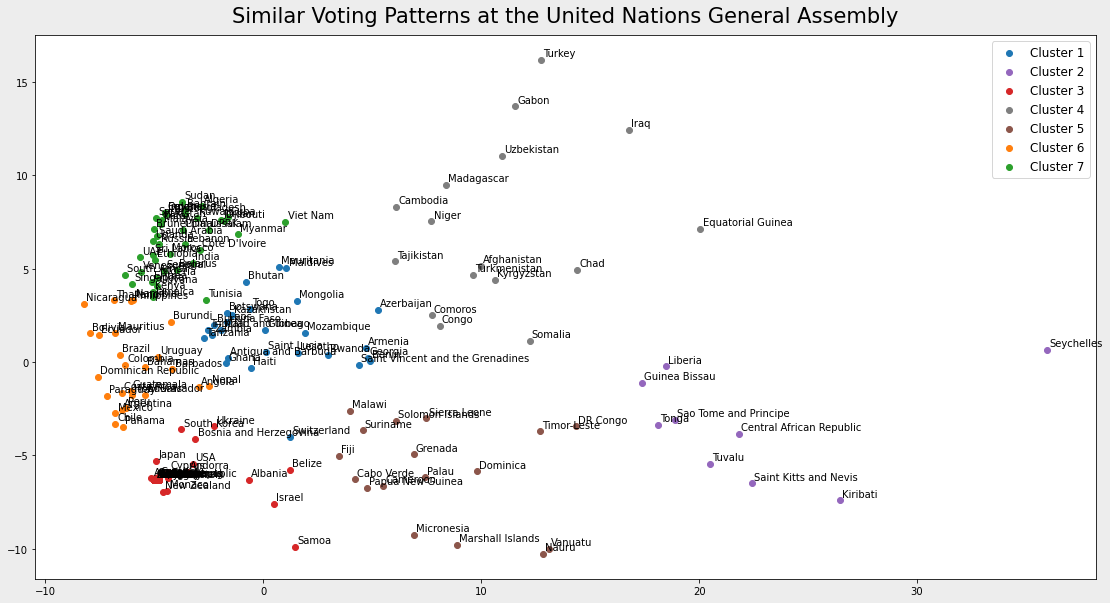

In [39]:
# Build scatterplot
print()
fig = plt.figure(figsize=(19,10))
fig.patch.set_facecolor('gainsboro')
fig.patch.set_alpha(0.5)
for lb,color in clucolor:
    subset = df6["red_labels"]==lb
    plt.scatter(df6[subset]["reddata_x"], df6[subset]["reddata_y"], c=color, label=lb)
    for x, y, s in zip(df6[subset]["reddata_x"], df6[subset]["reddata_y"],df6[subset]['Countryname']):
        plt.text(x+0.1,y+0.2,s) 
plt.title("Similar Voting Patterns at the United Nations General Assembly", fontsize=21, pad=13)
plt.legend(fontsize=12)
plt.savefig("unga.png", bbox_inches="tight", dpi=250)

Let's zoom into clusters 3, 6 and 7

In [40]:
# Build another scatterplot contaning only labels 1,3,6,7
index_nums = [0,2,5,6]
clucolor_sel = [clucolor[val] for val in index_nums]
clucolor_sel

[('Cluster 1', 'tab:blue'),
 ('Cluster 3', 'tab:red'),
 ('Cluster 6', 'tab:orange'),
 ('Cluster 7', 'tab:green')]

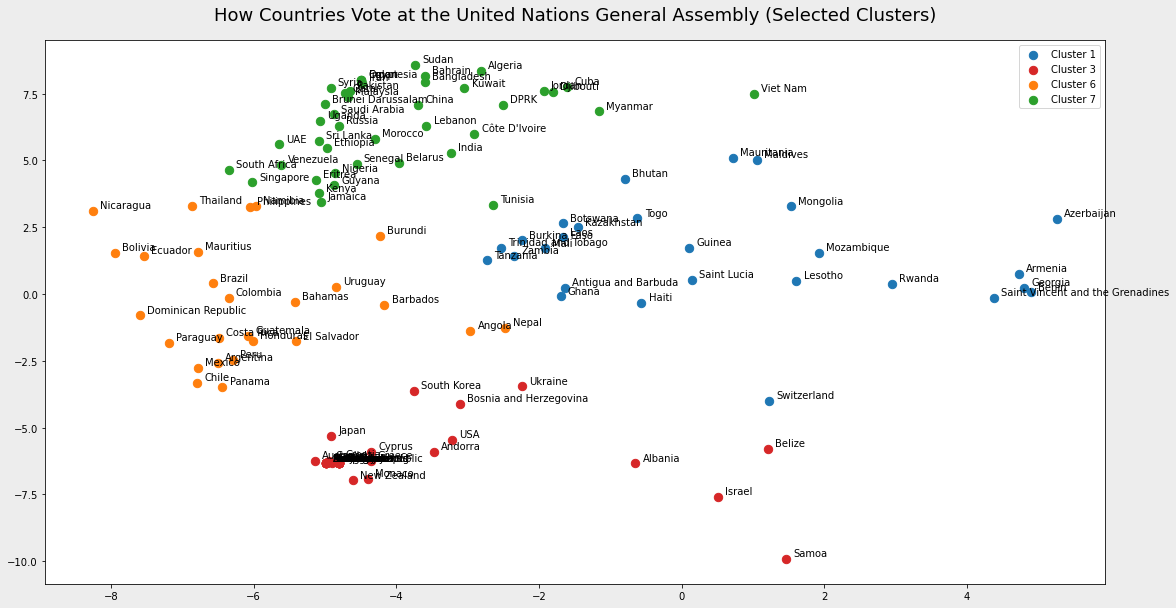

In [41]:
fig = plt.figure(figsize=(19,10))
fig.patch.set_facecolor('gainsboro')
fig.patch.set_alpha(0.5)
for lb,color in clucolor_sel:
    subset = df6["red_labels"]==lb
    plt.scatter(df6[subset]["reddata_x"], df6[subset]["reddata_y"], c=color, label=lb, s=70)
    for x, y, s in zip(df6[subset]["reddata_x"], df6[subset]["reddata_y"],df6[subset]['Countryname']):
        plt.text(x+0.1,y+0.1,s) 
plt.title("How Countries Vote at the United Nations General Assembly (Selected Clusters)", fontsize=18, pad=20)
plt.legend()
plt.savefig("unga_sel.png", bbox_inches='tight')

This is the end of this project. Thanks for reading this far!